In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np

In [2]:
def lowpassfilter(x, dt, RC): # input signal, time step, and time constant
    y = np.zeros( x.shape, dtype=float)
    alpha = dt / (RC + dt)
    y[0] = alpha*x[0]
    for it in range(tmax):
        y[it] = alpha*x[it] + (1.-alpha)*y[it-1] # recursive filter
    return y # output signal

def highpassfilter( x, dt, tau):
    y = np.zeros( x.shape, dtype=float)
    alpha = dt / (tau + dt)
    y[0] = alpha*x[0]
    for it in range(tmax):
        y[it] = alpha*(x[it]-x[it-1]) + alpha*y[it-1] # recursive filter
    return y

def fsin(t, p1, p2, p3): # input sine wave, ampl, freq, phase
    return p1*np.sin(p2*t+p3)

In [3]:
tmax = 1000            # time range (sec)
dt = 1.0               # time interval (sec)

Text(0, 0.5, 'input - magenta / output - green')

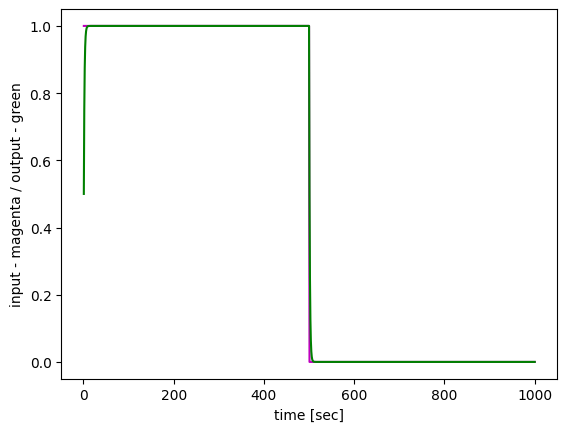

In [9]:
# step response

RC = 1.                # time constant (sec), try 1,10, 100

time = np.linspace( 1, tmax, num = tmax, dtype=int )

xi = np.zeros( (tmax), dtype=float) # build step function
for it in range(tmax//2):
    xi[it] = 1.

#yi = highpassfilter(xi, dt, RC)
yi = lowpassfilter(xi, dt, RC)

plt.plot(time,xi,"m-")
plt.plot(time,yi,"g-")
plt.xlabel('time [sec]')
plt.ylabel('input - magenta / output - green')

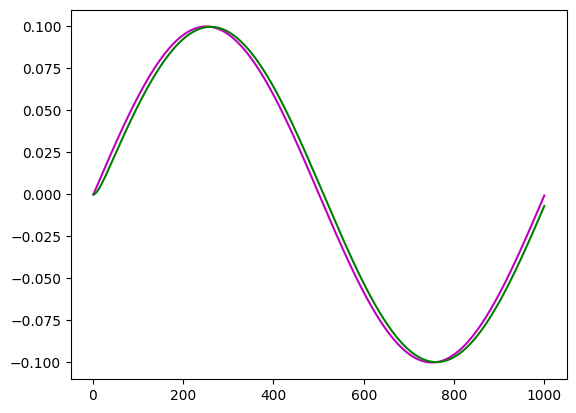

In [14]:
# frequency response

RC = 10.

amp = 0.1               # amplitude
omega = 2.*np.pi*0.001    # frequency, try 0.001, 0.01, 0.1 with RC = 10.
phi = 0.0               # phase

time = np.linspace( 1, tmax, num = tmax, dtype=int )

xi = np.zeros( (tmax), dtype=float) # build sinusoidal function

for it in range(tmax):
    xi[it] = amp*np.sin(omega*it+phi)

#yi = highpassfilter(xi, dt, RC)
yi = lowpassfilter(xi, dt, RC)

plt.plot(time,xi,"m-")
plt.plot(time,yi,"g-")


Text(0, 0.5, 'input - magenta / output - green')

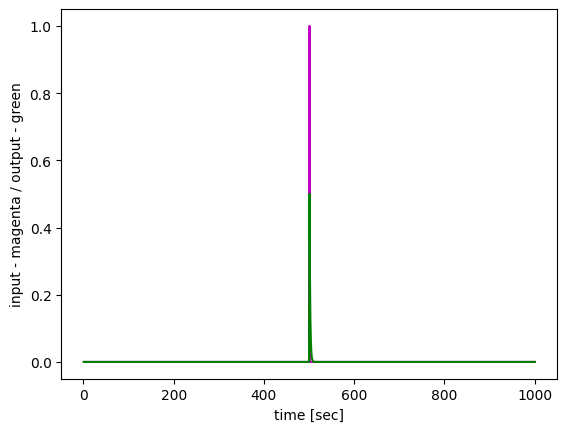

In [20]:
#impulse response

RC = 1.

time = np.linspace( 1, tmax, num = tmax, dtype=int ) # build impulse function
xi = np.zeros( (tmax), dtype=float)
xi[tmax//2] = 1.

#yi = highpassfilter(xi, dt, RC)
yi = lowpassfilter(xi, dt, RC)

plt.plot(time,xi,"m-")
plt.plot(time,yi,"g-")
plt.xlabel('time [sec]')
#plt.yscale('log')
plt.ylabel('input - magenta / output - green')

In [7]:

px, cx = fit.curve_fit(fsin, time, xi, p0=[amp,omega,phi])
py, cy = fit.curve_fit(fsin, time, yi, p0=[amp,omega,phi])
print(px,py)

[0.00200164 0.62767747 1.26424115] [ 3.04936216e-04  6.28273437e-01 -1.46037445e-01]
